In [10]:
import requests
import pandas as pd
from lib_func import save_text_from_url
from io import StringIO

#Daily releases
url = 'https://www-app3.gfz-potsdam.de/kp_index/Kp_ap_Ap_SN_F107_since_1932.txt'
#File name
filename = 'solar.txt'

save_text_from_url(url, filename)
f = open('solar.txt', 'r')
data = f.read()
data_lines = data.split('\n')

instructions = data_lines[:39]
solar_data = data_lines[39:-1]
full_txt_data = ''
for l in solar_data:
    full_txt_data += l + "\n"
df = pd.read_csv(StringIO(full_txt_data), sep='\s+')
df['max_Kp'] = df[['Kp1', 'Kp2', 'Kp3', 'Kp4', 'Kp5', 'Kp6', 'Kp7', 'Kp8']].max(axis=1)
df.to_csv('historical_forecast.csv')

<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dviab\AppData\Local\Temp\ipykernel_5452\1745217064.py:21: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(StringIO(full_txt_data), sep='\s+')


File saved as 'solar.txt'


<Axes: xlabel='#YYY'>

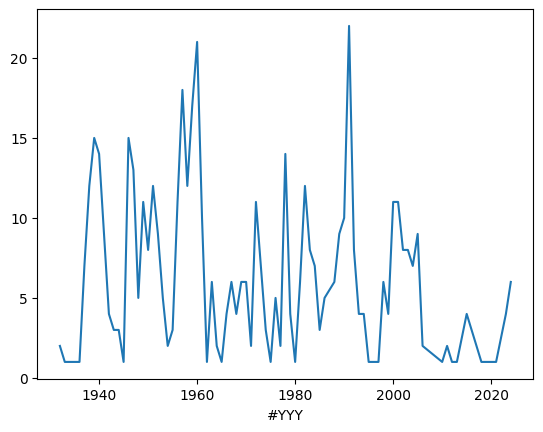

In [12]:
dflimit = df.loc[df.max_Kp>7]
(dflimit.groupby('#YYY')['max_Kp'].count()).plot()